<a href="https://colab.research.google.com/github/kelseykyla/KNN_assignment/blob/main/KNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from sklearn.datasets import load_digits
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
digits = load_digits()

In [8]:
# Create a DataFrame
digits_df = pd.DataFrame(data=digits.data)

# Add the target column
digits_df['target'] = digits.target

# Display the first few rows of the DataFrame
digits_df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


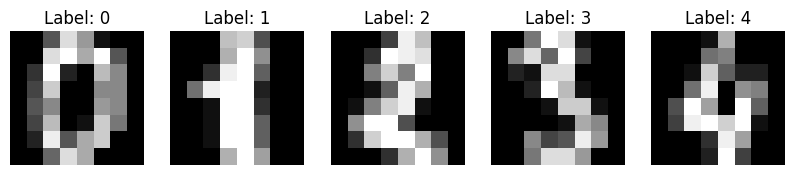

In [9]:
# Plot some sample digits
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for ax, image, label in zip(axes, digits.images[:5], digits.target[:5]):
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()


In [19]:
#Check for missing values
missing_values = digits_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


#Check for duplicates
duplicates = digits_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Missing values in each column:
0         0
1         0
2         0
3         0
4         0
         ..
60        0
61        0
62        0
63        0
target    0
Length: 65, dtype: int64
Number of duplicate rows: 0


In [48]:
# split the data into training and test set
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# drop the target variable
X = digits_df.drop(['target'], axis = 1)
y = digits_df['target']

# split the dataset into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# create a Linear Regression model.
# Initialize the n_neighbors
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors)

# Fit the model to the train set
knn.fit(X_train, y_train)

# predict the model
y_predict = knn.predict(X_test)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_predict)
print(f'The accuracy score is: {accuracy}')

# classification report
# Calculate and print Classification Report
class_report = classification_report(y_test, y_predict)
print(f'Classification Report:\n{class_report}')

# create confusion matrix
print()
conf_matrix = confusion_matrix(y_test, y_predict)

# Define class labels for digits (0-9)
labels = [f'{i}: class{i}' for i in range(10)]

# convert the matrix to a DataFrame.
conf_matrix_df = pd.DataFrame(conf_matrix, index = labels, columns = labels)
print("The confusion matrix is as follows")
conf_matrix_df

The accuracy score is: 0.9833333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360


The confusion matrix is as follows


,0: class0,1: class1,2: class2,3: class3,4: class4,5: class5,6: class6,7: class7,8: class8,9: class9
0: class0,33,0,0,0,0,0,0,0,0,0
1: class1,0,28,0,0,0,0,0,0,0,0
2: class2,0,0,33,0,0,0,0,0,0,0
3: class3,0,0,0,34,0,0,0,0,0,0
4: class4,0,0,0,0,46,0,0,0,0,0
5: class5,0,0,0,0,0,46,1,0,0,0
6: class6,0,0,0,0,0,0,35,0,0,0
7: class7,0,0,0,0,0,0,0,33,0,1
8: class8,0,1,0,0,0,0,0,0,29,0
9: class9,0,0,0,1,1,1,0,0,0,37


### Conclusion on the accuracy of the model after 80% and 20% split
**Accuracy Score**

Accuracy: 0.9833

Interpretation: The model achieved an accuracy of approximately 98.33%, which indicates a very high proportion of correct predictions overall. This suggests that the model performs well and is effective in classifying digits.

**Classification Report**

Precision:

Measures the accuracy of the positive predictions for each class.
Most classes have precision values close to 1.00, indicating very few false positives and high accuracy in positive predictions.

Recall:

Measures the ability of the model to identify all relevant instances for each class.
Recall values are also high, indicating that the model successfully identifies most of the true positives for each class.

F1-Score:

The harmonic mean of precision and recall.
The F1-scores are high, reflecting a balanced performance with both high precision and recall across all classes.

Macro Average:

Average performance across all classes.
Macro averages of precision, recall, and F1-score are around 0.98, showing consistent performance across all classes.

Weighted Average:

Takes into account the support (number of instances) for each class.
Weighted averages match the macro averages, indicating that performance is consistent regardless of class imbalances.

Confusion Matrix

Diagonal Values: Represent correct predictions for each class.
Diagonal values are high, indicating that most predictions are correct for each class.

## Splitting the dataset into 50% training and 50% Test set


In [53]:
# split the data into training and test set
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# copy the original dataset
X_copy = X.copy()
y_copy = y.copy()

# split the dataset into 80% and 20%
X_copy_train, X_copy_test, y_copy_train, y_copy_test = train_test_split(X_copy, y_copy, test_size = 0.5, random_state=42)

# create a Linear Regression model.
# Initialize the n_neighbors
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors)

# Fit the model to the train set
knn.fit(X_copy_train, y_copy_train)

# predict the model
y_predict = knn.predict(X_copy_test)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_copy_test, y_predict)
print(f'The accuracy score is: {accuracy}')

# classification report
# Calculate and print Classification Report
class_report = classification_report(y_copy_test, y_predict)
print(f'Classification Report:\n{class_report}')

# create confusion matrix
print()
conf_matrix = confusion_matrix(y_copy_test, y_predict)

# Define class labels for digits (0-9)
labels = [f'{i}: class{i}' for i in range(10)]

# convert the matrix to a DataFrame.
conf_matrix_df = pd.DataFrame(conf_matrix, index = labels, columns = labels)
print("The confusion matrix is as follows")
conf_matrix_df

The accuracy score is: 0.9866518353726362
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.99      1.00      0.99        89
           2       0.99      1.00      0.99        83
           3       0.99      0.96      0.97        93
           4       0.99      1.00      0.99        93
           5       0.99      0.98      0.98        99
           6       1.00      1.00      1.00        98
           7       0.97      1.00      0.98        87
           8       0.98      0.98      0.98        83
           9       0.98      0.96      0.97        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899


The confusion matrix is as follows


,0: class0,1: class1,2: class2,3: class3,4: class4,5: class5,6: class6,7: class7,8: class8,9: class9
0: class0,82,0,0,0,0,0,0,0,0,0
1: class1,0,89,0,0,0,0,0,0,0,0
2: class2,0,0,83,0,0,0,0,0,0,0
3: class3,0,0,1,89,0,0,0,2,1,0
4: class4,0,0,0,0,93,0,0,0,0,0
5: class5,0,0,0,0,0,97,0,0,0,2
6: class6,0,0,0,0,0,0,98,0,0,0
7: class7,0,0,0,0,0,0,0,87,0,0
8: class8,0,1,0,0,0,0,0,1,81,0
9: class9,0,0,0,1,1,1,0,0,1,88


## Conclusion on the model performance after the 50% training split and 50% test set spit

**Accuracy Score**

Accuracy: 0.9867

Interpretation: The model achieved an accuracy of approximately 98.67%. This high accuracy indicates that the KNN classifier correctly predicted the class labels for nearly 99% of the test samples.

**Classification Report**

Precision:

Measures the accuracy of positive predictions.
Most classes have precision values very close to 1.00, indicating that the model is highly effective in making accurate predictions for each class.

Recall:

Measures the ability to identify all relevant instances.
Recall values are also high, showing that the model successfully identifies most of the true positives for each class.

F1-Score:

The harmonic mean of precision and recall.
F1-scores are high across all classes, reflecting balanced performance in terms of both precision and recall.

Macro Average:

Averages precision, recall, and F1-score across all classes.
Macro averages are around 0.99, showing that the model performs consistently across different classes.

Weighted Average:

Takes into account the support (number of instances) for each class.
Weighted averages are also around 0.99, indicating that the model's performance is robust even with varying class frequencies.

**Confusion Matrix**
Diagonal Values: Represent the number of correctly classified instances for each class.
The diagonal values are high, demonstrating that the model correctly classifies most instances for each class.

### Splitting the dataset into 30% training and 70% Test set

In [54]:
# split the data into training and test set
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# copy the original dataset
X_copy_2 = X.copy()
y_copy_2 = y.copy()

# split the dataset into 80% and 20%
X_copy_train, X_copy_test, y_copy_train, y_copy_test = train_test_split(X_copy_2, y_copy_2, test_size = 0.7, random_state=42)

# create a Linear Regression model.
# Initialize the n_neighbors
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors)

# Fit the model to the train set
knn.fit(X_copy_train, y_copy_train)

# predict the model
y_predict = knn.predict(X_copy_test)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_copy_test, y_predict)
print(f'The accuracy score is: {accuracy}')

# classification report
# Calculate and print Classification Report
class_report = classification_report(y_copy_test, y_predict)
print(f'Classification Report:\n{class_report}')

# create confusion matrix
print()
conf_matrix = confusion_matrix(y_copy_test, y_predict)

# Define class labels for digits (0-9)
labels = [f'{i}: class{i}' for i in range(10)]

# convert the matrix to a DataFrame.
conf_matrix_df = pd.DataFrame(conf_matrix, index = labels, columns = labels)
print("The confusion matrix is as follows")
conf_matrix_df

The accuracy score is: 0.9745627980922098
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       0.95      0.99      0.97       125
           2       0.96      0.98      0.97       117
           3       0.98      0.92      0.95       128
           4       0.98      0.99      0.98       121
           5       0.99      0.99      0.99       134
           6       1.00      1.00      1.00       140
           7       0.96      1.00      0.98       130
           8       0.95      0.94      0.94       115
           9       0.98      0.93      0.96       131

    accuracy                           0.97      1258
   macro avg       0.97      0.97      0.97      1258
weighted avg       0.97      0.97      0.97      1258


The confusion matrix is as follows


,0: class0,1: class1,2: class2,3: class3,4: class4,5: class5,6: class6,7: class7,8: class8,9: class9
0: class0,117,0,0,0,0,0,0,0,0,0
1: class1,0,124,0,0,0,0,0,0,1,0
2: class2,0,1,115,0,0,0,0,0,1,0
3: class3,0,0,4,118,0,0,0,2,3,1
4: class4,0,0,0,0,120,0,0,1,0,0
5: class5,0,0,0,1,0,132,0,0,0,1
6: class6,0,0,0,0,0,0,140,0,0,0
7: class7,0,0,0,0,0,0,0,130,0,0
8: class8,0,5,1,0,0,0,0,1,108,0
9: class9,0,0,0,2,3,2,0,1,1,122


#### Conclusion on the model performance after the 30% training split and 70% test set spit

**Accuracy Score**

Accuracy: 0.9746 (97.46%)

Interpretation: The model achieved a high accuracy, correctly predicting the class labels for approximately 97.46% of the test samples. This indicates strong performance overall.

**Classification Report**

Precision: Measures the accuracy of positive predictions.
Most classes have precision values close to 1.00, indicating high accuracy in predicting each class.

Recall: Measures the ability to identify all relevant instances.
Recall is also high for most classes, showing that the model effectively identifies the majority of true positives.

F1-Score: The harmonic mean of precision and recall.
F1-scores are generally high, reflecting balanced performance in terms of both precision and recall for each class.

Macro Average: Average of precision, recall, and F1-score across all classes.
Macro averages are around 0.97, indicating that the model performs consistently across different classes.

Weighted Average: Takes into account the support (number of instances) for each class.
Weighted averages are also around 0.97, showing robust performance even with varying class frequencies.

**Confusion Matrix**

Diagonal Values: Represent the number of correctly classified instances for each class.
The diagonal values are high for most classes, showing that the model correctly classifies a large number of instances for each class.